# FIT5202 Assignment 1 : Analysing eCommerce Data

## Table of Contents
* 
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis. 

### 1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 

In [1]:
# Importing SparkConf, SparkContext and SparkSession classes
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession

# running Spark locally with as many working processors as logical cores on my machine
master = "local[*]"

# defining the an appropriate name for my application
app_name = "FIT5202_33483086 MOTH"

# configuration for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# creating the Spark session
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel("ERROR")

# setting the timezone
spark.conf.set("spark.sql.session.timeZone", "Australia/Melbourne")
print(spark.conf.get("spark.sql.session.timeZone"))
#reference: (“How to Set Timezone to UTC in Apache Spark?,” n.d.)

Australia/Melbourne


1.1.2 Load CUPS csv files into four RDDs.

In [2]:
# Creating four RDDs for CUPS
rdd_category = sc.textFile("sales/category.csv")
rdd_product = sc.textFile("sales/product.csv")
rdd_sales = sc.textFile("sales/sales.csv")
rdd_users = sc.textFile("users.csv")

# show content of category file
print(f"Category:")
print(rdd_category.take(5))

Category:
['category_id,category_code', '2090971686529663114,appliances.environment.vacuum', '2232732116498514828,apparel.jeans', '2232732109628244704,apparel.shirt', '2232732103294845523,apparel.shoes.step_ins']


In [3]:
# show content of products file
print(f"Products:")
print(rdd_product.take(5))

Products:
['product_id,category_id,brand,avg_cost', '100168127,2053013554096767303,,30.8171196068388', '7101887,2232732103764607583,,33.6457534471799', '100058603,2053013555438944659,,32.1982006550096', '100007811,2232732112782361392,etro,300.111251624047']


In [4]:
# show content of sales file
print(f"Sales:")
print(rdd_sales.take(5))

Sales:
['id,sales_timestamp,product_id,price,user_id,user_session', '338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357,0ad58441-9db9-48bd-9ee7-accf603f06e0', '338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649,2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc', '338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510,43609582-1818-4885-bd72-3791f3a4ec93', '338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483,bbf972ef-8f8d-4a33-bcbd-ac09af67ea40']


In [5]:
# show content of users file
print(f"Users:")
print(rdd_users.take(5))

Users:
['user_id,firstname,lastname,dob,address,postcode,state,sex,suburb', '514771925,MERVYN,Unknown,1-5-1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL', '531947692,FALLON,Unknown,16-10-2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE', '560231306,KALIN,Unknown,19-8-2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN', '575248835,PIETTA,Unknown,19-1-1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON']


1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [6]:
import csv

# a function to process the data, remove header for 4 rdds.
def rdd_processing(rdd):
    # parsing the record to prepare for processing
    parse_rdd = rdd.mapPartitions(lambda lines: csv.reader(lines, delimiter=","))
    # identifying the header and removing
    header = parse_rdd.first()
    rdd_without_header = parse_rdd.filter(lambda x: x != header)
    return rdd_without_header


# using the function created to remove header
rdd_category_without_header = rdd_processing(rdd_category)
print("Category:")
# Total records after header removal
total_count = rdd_category_without_header.count()
print(f"Total count of records: {total_count}")
# displaying the first 10 records
print(f"First 10 records:")
ten_records = rdd_category_without_header.take(10)
print(ten_records)

Category:
Total count of records: 1464
First 10 records:
[['2090971686529663114', 'appliances.environment.vacuum'], ['2232732116498514828', 'apparel.jeans'], ['2232732109628244704', 'apparel.shirt'], ['2232732103294845523', 'apparel.shoes.step_ins'], ['2232732086500851925', 'apparel.scarf'], ['2232732100660822557', 'country_yard.cultivator'], ['2053013558282682943', 'construction.tools.drill'], ['2053013562527318829', 'furniture.living_room.cabinet'], ['2110937143172923797', 'construction.tools.light'], ['2074462942123786261', 'kids.toys']]


In [7]:
# using the function created to remove header
rdd_product_without_header = rdd_processing(rdd_product)
print("Product:")
# Total records after header removal
total_count = rdd_product_without_header.count()
print(f"Total count of records: {total_count}")
# displaying the first 10 records
print(f"First 10 records:")
ten_records = rdd_product_without_header.take(10)
print(ten_records)

Product:
Total count of records: 208290
First 10 records:
[['100168127', '2053013554096767303', '', '30.8171196068388'], ['7101887', '2232732103764607583', '', '33.6457534471799'], ['100058603', '2053013555438944659', '', '32.1982006550096'], ['100007811', '2232732112782361392', 'etro', '300.111251624047'], ['26400508', '2053013553056579841', '', '139.458912588293'], ['100215722', '2134905019189691101', '', '4.15035271832127'], ['32402016', '2232732115777094520', '', '5.90104832419485'], ['13201248', '2232732061804790604', 'brw', '400.468187201711'], ['2701879', '2053013563911439225', 'beko', '249.969115457257'], ['15300266', '2232732107698864813', '', '2.85509519214549']]


In [8]:
# using the function created to remove header
rdd_sales_without_header = rdd_processing(rdd_sales)
print("Sales:")
# Total records after header removal
total_count = rdd_sales_without_header.count()
print(f"Total count of records: {total_count}")
# displaying the first 10 records
print(f"First 10 records:")
ten_records = rdd_sales_without_header.take(10)
print(ten_records)

Sales:
Total count of records: 6848824
First 10 records:
[['338156802', '2020-03-27 02:03:48.000000 +00:00', '4804056', '171.56', '513119357', '0ad58441-9db9-48bd-9ee7-accf603f06e0'], ['338156808', '2020-03-27 02:03:49.000000 +00:00', '1005223', '209.53', '522277649', '2ecb2725-2c40-4acb-8ef1-05e39ea4c2cc'], ['338156913', '2020-03-27 02:04:11.000000 +00:00', '1005212', '174.25', '632847510', '43609582-1818-4885-bd72-3791f3a4ec93'], ['338156921', '2020-03-27 02:04:13.000000 +00:00', '1005236', '231.15', '626579483', 'bbf972ef-8f8d-4a33-bcbd-ac09af67ea40'], ['338156953', '2020-03-27 02:04:18.000000 +00:00', '1005212', '174.25', '633245502', '90166e0d-d7da-4997-b479-bc3a0fd724d6'], ['338156985', '2020-03-27 02:04:24.000000 +00:00', '100132156', '47.5', '541680528', '4cd111cc-8716-4720-b7e3-bc3c8ddce98f'], ['338157055', '2020-03-27 02:04:37.000000 +00:00', '3500009', '290.84', '618162129', 'd0bda424-a759-4941-b9be-5091c28009db'], ['338157122', '2020-03-27 02:04:48.000000 +00:00', '2300214'

In [9]:
# using the function created to remove header
rdd_users_without_header = rdd_processing(rdd_users)
print("Users:")
# Total records after header removal
total_count = rdd_users_without_header.count()
print(f"Total count of records: {total_count}")
# displaying the first 10 records
print(f"First 10 records:")
ten_records = rdd_users_without_header.take(10)
print(ten_records)

Users:
Total count of records: 15639803
First 10 records:
[['514771925', 'MERVYN', 'Unknown', '1-5-1963', '30A LUCINDA AVENUE', '2260', 'NSW', 'male', 'WAMBERAL'], ['531947692', 'FALLON', 'Unknown', '16-10-2002', '82 CAMBERWARRA DRIVE', '6025', 'WA', 'female', 'CRAIGIE'], ['560231306', 'KALIN', 'Unknown', '19-8-2015', '74 SOLDIERS ROAD', '2281', 'NSW', 'male', 'PELICAN'], ['575248835', 'PIETTA', 'Unknown', '19-1-1962', 'UNIT 1, 1 LARK AVENUE', '5023', 'SA', 'female', 'SEATON'], ['575243330', 'SUMMAH', 'Unknown', '19-4-1973', '44 CLARENDON ROAD', '2048', 'NSW', 'female', 'STANMORE'], ['516606243', 'KEIRA', 'Unknown', '9-6-2011', '1 VIOLA CLOSE', '4868', 'QLD', 'female', 'BAYVIEW HEIGHTS'], ['545807768', 'VERITY', 'Unknown', '1-2-1980', '31-33 KING STREET', '3550', 'VIC', 'female', 'BENDIGO'], ['529118965', 'MAXWELL', 'Unknown', '16-5-2012', '15 HARWELL WAY', '6721', 'WA', 'male', 'WEDGEFIELD'], ['518625399', 'NATASHIA', 'Unknown', '5-6-1973', 'UNIT 3, 17 BOX STREET', '6530', 'WA', 'fema

1.1.4 Drop unnecessary columns from RDDs: firstname, lastname, user_session.

In [10]:
# removing the firstname and lastname columns from the Users data
rdd_users_filtered = rdd_users_without_header.map(lambda x: [x[0]] + x[3:])
# printing the resultatnt
print("Users: ")
print(rdd_users_filtered.take(10))

Users: 
[['514771925', '1-5-1963', '30A LUCINDA AVENUE', '2260', 'NSW', 'male', 'WAMBERAL'], ['531947692', '16-10-2002', '82 CAMBERWARRA DRIVE', '6025', 'WA', 'female', 'CRAIGIE'], ['560231306', '19-8-2015', '74 SOLDIERS ROAD', '2281', 'NSW', 'male', 'PELICAN'], ['575248835', '19-1-1962', 'UNIT 1, 1 LARK AVENUE', '5023', 'SA', 'female', 'SEATON'], ['575243330', '19-4-1973', '44 CLARENDON ROAD', '2048', 'NSW', 'female', 'STANMORE'], ['516606243', '9-6-2011', '1 VIOLA CLOSE', '4868', 'QLD', 'female', 'BAYVIEW HEIGHTS'], ['545807768', '1-2-1980', '31-33 KING STREET', '3550', 'VIC', 'female', 'BENDIGO'], ['529118965', '16-5-2012', '15 HARWELL WAY', '6721', 'WA', 'male', 'WEDGEFIELD'], ['518625399', '5-6-1973', 'UNIT 3, 17 BOX STREET', '6530', 'WA', 'female', 'WEBBERTON'], ['518273873', '27-8-2007', 'UNIT 909, 112 GODERICH STREET', '6004', 'WA', 'male', 'EAST PERTH']]


In [11]:
# removing the user_session column from the Sales data
rdd_sales_filtered = rdd_sales_without_header.map(lambda x: x[:-1])
# printing the resultatnt
print("Sales: ")
print(rdd_sales_filtered.take(10))

Sales: 
[['338156802', '2020-03-27 02:03:48.000000 +00:00', '4804056', '171.56', '513119357'], ['338156808', '2020-03-27 02:03:49.000000 +00:00', '1005223', '209.53', '522277649'], ['338156913', '2020-03-27 02:04:11.000000 +00:00', '1005212', '174.25', '632847510'], ['338156921', '2020-03-27 02:04:13.000000 +00:00', '1005236', '231.15', '626579483'], ['338156953', '2020-03-27 02:04:18.000000 +00:00', '1005212', '174.25', '633245502'], ['338156985', '2020-03-27 02:04:24.000000 +00:00', '100132156', '47.5', '541680528'], ['338157055', '2020-03-27 02:04:37.000000 +00:00', '3500009', '290.84', '618162129'], ['338157122', '2020-03-27 02:04:48.000000 +00:00', '2300214', '386.08', '626601722'], ['338157141', '2020-03-27 02:04:52.000000 +00:00', '100070443', '35.01', '604369152'], ['338157271', '2020-03-27 02:05:14.000000 +00:00', '1306659', '431.09', '616395888']]


### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition. Answer the following questions: How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number? (Hint: search the Spark source code to try to answer this question.) Write code and your explanation in Markdown cells.

In [12]:
# creating a function to identify and print out the partitions
def partitions_print(rdd, data_name):
    rdd_partitions = rdd.getNumPartitions()
    print(f"{data_name}:")
    print(f"No. of partitions: {rdd_partitions}")
    # identifying number of records
    record_data = rdd.mapPartitions(lambda it: [sum(1 for _ in it)]).collect()
    for index, part in enumerate(record_data):
        if part > 0:
            print(f"Partition {index}: {part} records")
    print()


# using the above created function to display the no. of partitions and records in each partition
category_partitions_record = partitions_print(rdd_category, "Customer")
product_partitions_record = partitions_print(rdd_product, "Product")
sales_partitions_record = partitions_print(rdd_sales, "Sales")
user_partitions_record = partitions_print(rdd_users, "Users")

Customer:
No. of partitions: 2
Partition 0: 648 records
Partition 1: 817 records

Product:
No. of partitions: 2
Partition 0: 104193 records
Partition 1: 104098 records

Sales:
No. of partitions: 22
Partition 0: 315833 records
Partition 1: 315940 records
Partition 2: 316009 records
Partition 3: 319748 records
Partition 4: 319808 records
Partition 5: 319827 records
Partition 6: 319861 records
Partition 7: 319855 records
Partition 8: 317174 records
Partition 9: 316760 records
Partition 10: 316656 records
Partition 11: 316733 records
Partition 12: 316682 records
Partition 13: 316607 records
Partition 14: 316439 records
Partition 15: 316229 records
Partition 16: 316253 records
Partition 17: 316229 records
Partition 18: 316133 records
Partition 19: 316127 records
Partition 20: 316023 records
Partition 21: 187899 records

Users:
No. of partitions: 39
Partition 0: 407685 records
Partition 1: 407751 records
Partition 2: 407663 records
Partition 3: 407640 records
Partition 4: 407740 records
Part

Q1) How many partitions do the above RDDs have?

1. Category - 2 partitions
2. Product - 2 partitions
3. Sales - 21 partitions
4. Users - 39 partitions

Q2) How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy?
    
The files are partitioned using the Round-robin partitioning strategy or random-equal partitioning by default.
By default, Spark creates one partition for one block of file, usually 128MB in HDFS by default. (Spark Programming Guide - Spark 2.1.0 Documentation, n.d.)

Below are a few scenarios where we do not specify any partitioning strategy explicitly:

    * The dataset might be large
    * To be able to use parallel processing across all available resources
    * Data Skew

Q3) Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number?

The default number of partitions is determing by Spark based on the available CPU cores in the cluster. If there is a single core, then the default partition will be set to 1. Each unit of paralellism will be a representation of each partition.
In this case, the partitioning reasoning can be attributed to factors such as data skewness. When data is not evenly distributed, some partitions contain more data that the others.






1.2.2. Create a user defined function (UDF) to transform category_code to capitalized words. (e.g. apparel.shoes.ballet_shoes shall be converted to “Apparel Shots Ballet_shoes).

In [13]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# defining the UDF needed for creating capitalized words
def capitalized_cat_code(category_code):
    # splitting the categoru codes by the delimeter
    cat_parts = category_code.split(".")
    capitalized_cat_parts = [part.capitalize() for part in cat_parts]
    # Joining the code back based on the Example "Apparel Shots Ballet_shoes"
    capitalized_cat_code = " ".join(capitalized_cat_parts)
    return capitalized_cat_code


# Using the aboe function to extract in mentioned format for category data
rdd_category_updated = rdd_category_without_header.map(
    lambda x: [x[0], capitalized_cat_code(x[1])]
)
rdd_category_updated.take(5)

[['2090971686529663114', 'Appliances Environment Vacuum'],
 ['2232732116498514828', 'Apparel Jeans'],
 ['2232732109628244704', 'Apparel Shirt'],
 ['2232732103294845523', 'Apparel Shoes Step_ins'],
 ['2232732086500851925', 'Apparel Scarf']]

1.2.3. Join Product and Category RDDs and Create a new key value RDD, using brand as the key and all of the categories of that brand as the value. Print out the first 5 records of the key-value RDD.

In [14]:
# sorting the category RDD
rdd_category_kv = rdd_category_updated.map(lambda x: (x[0], x[1]))
# creating the brand and category id rdd
rdd_product_brand = rdd_product_without_header.map(lambda x: (x[1], x[2]))
# joining the above two rdds
rdd_joined = rdd_category_kv.join(rdd_product_brand)
# extracting to create the key value pair rdd with brand as key
brand_category_product_rdd = rdd_joined.map(lambda x: (x[1][1], x[1][0]))
# grouping the brands to show all categories
grouped_rdd = brand_category_product_rdd.groupByKey()
# the list is converted to a set to ensure categories are unique
grouped_rdd_list = grouped_rdd.mapValues(
    lambda categories: sorted(list(set(categories)))
)
print(grouped_rdd_list.take(5))

[('domani-spa', ['Electronics Clocks', 'Furniture Bathroom Bath', 'Furniture Living_room Cabinet', 'Others']), ('', ['Accessories Bag', 'Accessories Umbrella', 'Accessories Wallet', 'Apparel Belt', 'Apparel Costume', 'Apparel Dress', 'Apparel Glove', 'Apparel Jacket', 'Apparel Jeans', 'Apparel Jumper', 'Apparel Pajamas', 'Apparel Scarf', 'Apparel Shirt', 'Apparel Shoes', 'Apparel Shoes Ballet_shoes', 'Apparel Shoes Espadrilles', 'Apparel Shoes Keds', 'Apparel Shoes Moccasins', 'Apparel Shoes Sandals', 'Apparel Shoes Slipons', 'Apparel Shoes Step_ins', 'Apparel Shorts', 'Apparel Skirt', 'Apparel Sock', 'Apparel Trousers', 'Apparel Tshirt', 'Apparel Underwear', 'Appliances Environment Air_conditioner', 'Appliances Environment Air_heater', 'Appliances Environment Climate', 'Appliances Environment Fan', 'Appliances Environment Vacuum', 'Appliances Environment Water_heater', 'Appliances Iron', 'Appliances Ironing_board', 'Appliances Kitchen Blender', 'Appliances Kitchen Coffee_grinder', 'Ap

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average daily sales for each year, each month. Print the results as the following format(see assignment specification).**

In [15]:
# mapping the sales on a daily level
rdd_sales_day = rdd_sales_filtered.map(lambda date: (date[1][:10], float(date[3])))
# grouping by key (sales for one day)
rdd_sales_day_grouped = rdd_sales_day.groupByKey().mapValues(list)
# finding sum of sales each day
rdd_sales_day_total = rdd_sales_day_grouped.map(
    lambda x: (x[0], sum(float(price) for price in x[1]))
)
# taking of the day and getting monthly data
rdd_month_year_total = rdd_sales_day_total.map(
    lambda data: (data[0][:7], float(data[1]))
)
rdd_month_year_sales = rdd_month_year_total.groupByKey().mapValues(list)
# calculating average sales at the yearly level
rdd_year_daily_sales = rdd_month_year_sales.mapValues(
    lambda value: round(sum(value) / len(value), 2)
).sortByKey()

# printing the values in the table format
print("{:<10} {:<10} {:<15}".format("Year", "Month", "avg sales"))
print("=" * 35)

for key, value in rdd_year_daily_sales.collect():
    year, month = key.split("-")
    print("{:<10} {:<10} {:<15}".format(year, month, value))

Year       Month      avg sales      
2019       10         7417983.94     
2019       11         9489478.98     
2019       12         11102478.36    
2020       01         8701162.34     
2020       02         13144101.22    
2020       03         10367045.43    
2020       04         8150859.74     


**1.3.2 Find 10 of the best selling brands. You should display the brand and total revenue in the result.**

In [16]:
# retreive key-value pairs for product_id and brand
rdd_brand_product = rdd_product_without_header.map(lambda x: (x[0], x[2]))
# retreive key-value pairs for product_id and sales
rdd_product_sales = rdd_sales_filtered.map(lambda x: (x[2], float(x[3])))
# Join the tables
rdd_joined = (
    rdd_brand_product.join(rdd_product_sales)
    .map(lambda x: (x[1][0], x[1][1]))
    .reduceByKey(lambda a, b: a + b)
    .filter(lambda x: x[0] != "")
)
# sum the total sales for a brand
rdd_rvenue_brand = rdd_joined.mapValues(lambda price: round(price, 2)).sortBy(
    lambda x: x[1], ascending=False
)
# arrange in decending order of total sales
top_ten = rdd_rvenue_brand.take(10)
# print in table format
print("{:<30} {:<15}".format("Brand", "Total Revenue"))
print("=" * 45)

for brand, total_price in top_ten:
    print("{:<30} {:<15}".format(brand, total_price))

Brand                          Total Revenue  
apple                          1846051463.73  
samsung                        786833558.91   
xiaomi                         175269314.73   
huawei                         80182987.27    
lg                             73917724.57    
lucente                        54369150.0     
sony                           53442507.92    
acer                           53330141.39    
oppo                           51687235.69    
lenovo                         43567604.38    


## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

**2.1.1. Load CUPS into four separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: Initially, you should read date/time related column as the string type).**

In [17]:
from pyspark.sql.types import IntegerType, StringType, FloatType, DateType
from pyspark.sql.functions import *
from datetime import datetime
import dateutil.parser
from pyspark.sql.window import Window

# creating dataframes
df_category = spark.read.csv("sales/category.csv", header=True)
df_users = spark.read.csv("users.csv", header=True)
df_product = spark.read.csv("sales/product.csv", header=True)
df_sales = spark.read.csv("sales/sales.csv", header=True)

# formatting columns to its accurate data type
date_format = udf(lambda x: datetime.strptime(x, "%d-%m-%Y"), DateType())
df_product = df_product.withColumn("avg_cost", col("avg_cost").cast(FloatType()))
df_users = df_users.withColumn("dob", date_format(col("dob")))
df_sales = df_sales.withColumn("price", col("price").cast(FloatType()))

**Removing Duplicates for every product ID based on the highest length of category ID**

In [18]:
from pyspark.sql.types import IntegerType, StringType, FloatType, DateType
from pyspark.sql.functions import *
from datetime import datetime
import dateutil.parser
from pyspark.sql.window import Window

# removing duplicates from df_product
# creating a column to identify length of category id
df_product = df_product.withColumn("len_cat_id", length(col("category_id")))

# defining a windor to partition by product_id and order by cat ID in DESC order
window_len = Window.partitionBy("product_id").orderBy(col("category_id").desc())

# assigning a rank withi each partition
rank = df_product.withColumn("rank", dense_rank().over(window_len))

# keeping only rank 1 and filtering out the rest
rank_filter = rank.filter(col("rank") == 1)

# removing the new columns
df_product_without_duplicates = rank_filter.drop("rank", "len_cat_id")

# printing
df_product_without_duplicates.show()
print("Count of rows in the product dataframe:")
print(df_product.count())
print("Count of rows in the product dataframe after eliminating duplicates:")
print(df_product_without_duplicates.count())

# Removing from category DF
df_category = df_category.distinct()

+----------+-------------------+---------+----------+
|product_id|        category_id|    brand|  avg_cost|
+----------+-------------------+---------+----------+
| 100000023|2053013561277416167|   bigben| 48.619854|
| 100000024|2232732105123562109|  ubisoft| 57.042164|
| 100000030|2053013561277416167|thqnordic| 31.548983|
| 100000046|2232732081585127530|    delta|113.518875|
| 100000056|2053013553375346967|     null| 13.509704|
| 100000078|2232732102414041665|     null| 20.655043|
| 100000086|2125175529001713727|     zubr|  65.04839|
| 100000096|2232732081585127530|    delta|  108.9943|
| 100000104|2053013563693335403|    delta| 142.03502|
| 100000106|2053013563693335403|    delta| 128.95677|
| 100000108|2053013563693335403|    delta|  97.49383|
| 100000124|2053013563693335403|    delta|  89.15981|
| 100000125|2053013563693335403|    delta|  84.45619|
| 100000149|2053013565782098913|  respect|  70.58563|
| 100000178|2055156924466332447|      dam|  52.14051|
| 100000201|2053013555573162

Displaying all the dataframes

In [19]:
# displaying the dataframes
df_category.show()
df_users.show()
df_product_without_duplicates.show()
df_sales.show()

+-------------------+--------------------+
|        category_id|       category_code|
+-------------------+--------------------+
|2053013551890563264|           sport.ski|
|2097815753423061045|      apparel.tshirt|
|2232732100056842769|appliances.person...|
|2141478614846144872|       apparel.shoes|
|2053013566067311601|              others|
|2106075695351333719|              others|
|2053013558861496931|              others|
|2232732085594882243|              others|
|2232732137285484952|furniture.bathroo...|
|2232732067399992229|    computers.ebooks|
|2053013566277026813|        apparel.belt|
|2053013555908706737|       apparel.skirt|
|2232732087834640627|appliances.kitche...|
|2156718775112565355|              others|
|2232732106004365963|appliances.kitche...|
|2232732092490318178|   computers.desktop|
|2053013557787755041|              others|
|2095518917320508073|              others|
|2094006249627582860|accessories.umbrella|
|2053013561604571899|     apparel.costume|
+----------

**2.1.2 Display the schema of the four dataframes.**

In [20]:
# printing schema of the dataframes
print("Category:")
df_category.printSchema()
print("Products:")
df_product_without_duplicates.printSchema()
print("Users:")
df_users.printSchema()
print("Sales:")
df_sales.printSchema()

Category:
root
 |-- category_id: string (nullable = true)
 |-- category_code: string (nullable = true)

Products:
root
 |-- product_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: float (nullable = true)

Users:
root
 |-- user_id: string (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: date (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

Sales:
root
 |-- id: string (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: float (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_session: string (nullable = true)



### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

**2.2.1. Transform the 'sales_time' column in the sales dataframe to the date type; extract the hour in sales_date and create a new column “sales_hour”; after that, show the schema.**

In [21]:
from pyspark.sql.types import StringType, TimestampType
from pyspark.sql.functions import col, to_date, to_timestamp, hour

# transform the data type of 'sales_time' and creating a new column
df_sales_time = df_sales.withColumn(
    "sales_timestamp", col("sales_timestamp").cast(TimestampType())
)
# extracting the hour column
df_sales_hour = df_sales_time.withColumn("sales_hour", hour(col("sales_timestamp")))
# converting to date type
df_sales_date = df_sales_hour.withColumn(
    "sales_timestamp", to_date(col("sales_timestamp"))
)
# printing the dataframe and the schema
df_sales_date.show()
df_sales_date.printSchema()

+---------+---------------+----------+------+---------+--------------------+----------+
|       id|sales_timestamp|product_id| price|  user_id|        user_session|sales_hour|
+---------+---------------+----------+------+---------+--------------------+----------+
|338156802|     2020-03-27|   4804056|171.56|513119357|0ad58441-9db9-48b...|        13|
|338156808|     2020-03-27|   1005223|209.53|522277649|2ecb2725-2c40-4ac...|        13|
|338156913|     2020-03-27|   1005212|174.25|632847510|43609582-1818-488...|        13|
|338156921|     2020-03-27|   1005236|231.15|626579483|bbf972ef-8f8d-4a3...|        13|
|338156953|     2020-03-27|   1005212|174.25|633245502|90166e0d-d7da-499...|        13|
|338156985|     2020-03-27| 100132156|  47.5|541680528|4cd111cc-8716-472...|        13|
|338157055|     2020-03-27|   3500009|290.84|618162129|d0bda424-a759-494...|        13|
|338157122|     2020-03-27|   2300214|386.08|626601722|ce913646-936a-4b2...|        13|
|338157141|     2020-03-27| 1000

**2.2.2. Calculate total sales for each hour, sort your result based on each hour’s sales in a descending order. Print out the sales_hour and total_sales columns.**

In [22]:
from pyspark.sql.functions import *

# grouping by hour and aggregation followed by sorting in descending
df_sales_hr = (
    df_sales_date.groupBy("sales_hour")
    .agg(sum("price").alias("total_sales"))
    .orderBy(col("total_sales").desc())
)
# formatting the data to a readable format
df_sales_hr = df_sales_hr.withColumn(
    "total_sales", format_number(col("total_sales"), 2)
).show()

+----------+--------------+
|sales_hour|   total_sales|
+----------+--------------+
|        20|153,511,972.31|
|        19|152,162,799.24|
|        21|147,246,808.68|
|        18|144,179,584.58|
|        22|136,181,010.90|
|        17|136,075,394.32|
|        23|125,598,940.56|
|        16|122,840,674.68|
|         0|116,995,600.04|
|         1|110,803,533.10|
|         2|102,877,517.41|
|        15|101,009,945.91|
|         3| 94,410,169.23|
|         4| 85,415,642.23|
|         5| 70,938,222.58|
|        14| 67,361,740.56|
|         6| 52,667,169.95|
|         7| 34,294,152.08|
|        13| 31,814,464.30|
|         8| 22,258,807.81|
+----------+--------------+
only showing top 20 rows



**2.2.3.Find 10 most profitable categories (profit can be simply defined as price - avg_cost). Print out the category name and total profit. Please print the category name in capitalized word format(hint: you can reuse the UDF defined in part 1.)**

In [23]:
from pyspark.sql.functions import col, sum
from pyspark.sql.types import StringType

# aliasing columns
df_product_without_duplicates = df_product_without_duplicates.withColumnRenamed(
    "category_id", "p_category_id"
)
# joining sales, product and category dataframes
df_combined = df_sales_date.join(
    df_product_without_duplicates,
    df_sales_date["product_id"] == df_product_without_duplicates["product_id"],
).join(
    df_category,
    df_product_without_duplicates["p_category_id"] == df_category["category_id"],
)

# calculating profit
profit_df = (
    df_combined.withColumn("profit", col("price") - col("avg_cost"))
    .groupBy("category_id", "category_code")
    .agg(sum("profit").alias("Total Profit"))
    .orderBy(col("Total Profit").desc())
    .limit(10)
)

# formating
profit_df = profit_df.withColumn("Total Profit", format_number(col("Total Profit"), 2))

# registering the udf
capitalized_cat_udf = udf(capitalized_cat_code, StringType())

# using udf for capitalised words
result_df = profit_df.withColumn(
    "Category", capitalized_cat_udf(col("category_code"))
).select("Category", "Total Profit")

# printing
result_df.show()

+--------------------+-------------+
|            Category| Total Profit|
+--------------------+-------------+
|Construction Tool...|58,011,078.81|
|Appliances Person...| 5,109,978.55|
|  Computers Notebook| 3,515,245.56|
|Appliances Kitche...| 2,966,325.03|
|  Electronics Clocks| 1,623,781.27|
|Appliances Kitche...| 1,532,399.81|
|Electronics Audio...| 1,356,576.72|
|              Others| 1,181,926.07|
|Appliances Kitche...| 1,173,261.65|
|Electronics Smart...| 1,057,397.47|
+--------------------+-------------+



**2.2.4. Use DataFrame filters to find all transactions sold at loss (defined as price < avg_cost), calculate 10 worst loss margin in percentage. (margin is defined as (price - avg_cost)/avg_cost; if price - avg_cost > 0, it’s call a profit margin; otherwise a loss margin)**

In [24]:
from pyspark.sql.functions import col, expr

df_loss = df_combined.groupBy("id").agg(
    round(expr("(sum(price -avg_cost) / sum(avg_cost)) * 100"), 2).alias("loss_margin")
)
df_loss_10 = df_loss.orderBy(col("loss_margin").asc()).limit(10)
df_loss_10.show()

+---------+-----------+
|       id|loss_margin|
+---------+-----------+
|204037762|     -99.24|
|204017856|     -99.24|
|394075934|     -99.09|
|394106370|     -99.09|
|394083902|     -99.09|
|396544717|     -99.09|
|394112198|     -99.09|
|394129754|     -99.09|
|396531551|     -99.09|
|396598353|     -99.09|
+---------+-----------+



**2.2.5. Draw a barchart to show total sales from different states in each year.**

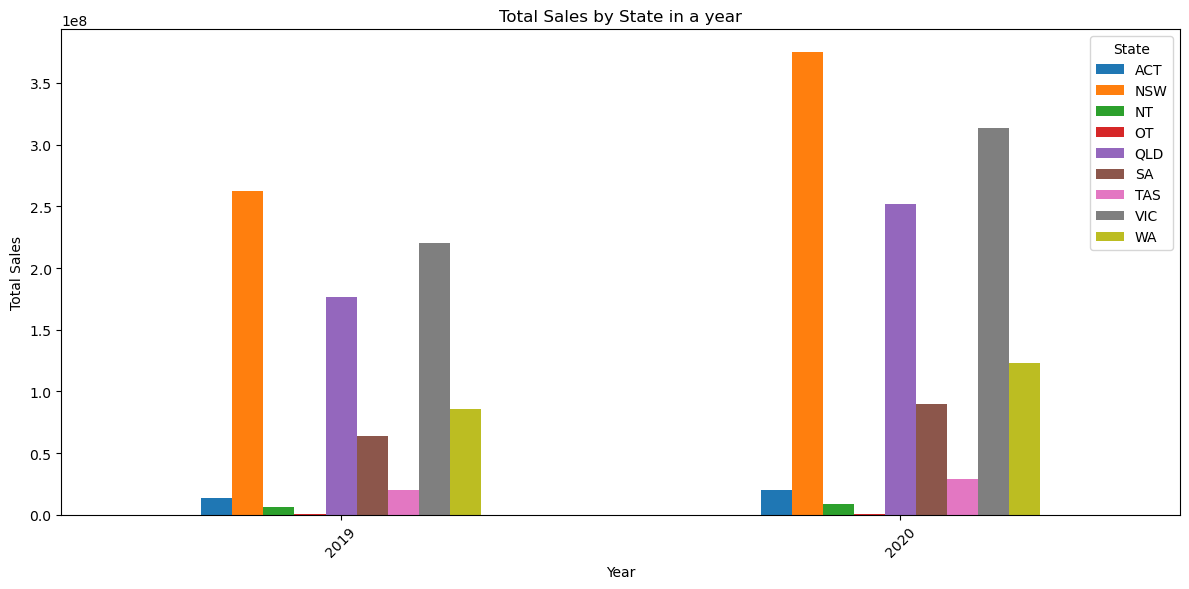

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# renaming the column to ensure it is unique
df_sales_date = df_sales_date.withColumnRenamed("user_id", "sales_user_id")
# joining sales and user data
df_users_sales = df_sales_date.join(
    df_users, df_sales_date["sales_user_id"] == df_users["user_id"]
)
# state and year grouping for total_sales
df_sales_state_year = df_users_sales.groupBy(
    "state", year("sales_timestamp").alias("year")
).agg(sum("price").alias("total_sales"))

# converting to pandas df for ease of ploting
pddf_sales_state_year = df_sales_state_year.toPandas()

# creating a summary for plotting
df_summary = pddf_sales_state_year.pivot(
    index="year", columns="state", values="total_sales"
)

# bar chart
axis = df_summary.plot(kind="bar", figsize=(12, 6))
axis.set_title("Total Sales by State in a year")
axis.set_xlabel("Year")
axis.set_ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="State")
plt.tight_layout()
plt.show()

**2.2.6. Draw a scatter plot of customer age and their total spending with MOTH. To limit the number of datapoints, you may show the top 1000 “most valuable” customers only. You may also use log scale for the XY axis.**

+---+--------------------+---------------------+
|age|total_spending      |Total_spending_by_age|
+---+--------------------+---------------------+
|10 |5.000793245563242E7 |50,007,932.46        |
|11 |4.973628586338264E7 |49,736,285.86        |
|12 |4.869971365284628E7 |48,699,713.65        |
|13 |4.752794939986992E7 |47,527,949.40        |
|14 |4.463453129044379E7 |44,634,531.29        |
|15 |4.3856005024751514E7|43,856,005.02        |
|16 |4.1412218051602185E7|41,412,218.05        |
|20 |3.8233194125211835E7|38,233,194.13        |
|18 |3.808708742630391E7 |38,087,087.43        |
|17 |3.789741411307305E7 |37,897,414.11        |
|19 |3.615895093715441E7 |36,158,950.94        |
|21 |3.517109656909895E7 |35,171,096.57        |
|23 |3.482964349309024E7 |34,829,643.49        |
|22 |3.4736004505505085E7|34,736,004.51        |
|24 |3.38835423601526E7  |33,883,542.36        |
|26 |3.353773014660421E7 |33,537,730.15        |
|25 |3.3078960193193436E7|33,078,960.19        |
|29 |3.2556744573564

<Axes: xlabel='age', ylabel='total_spending'>

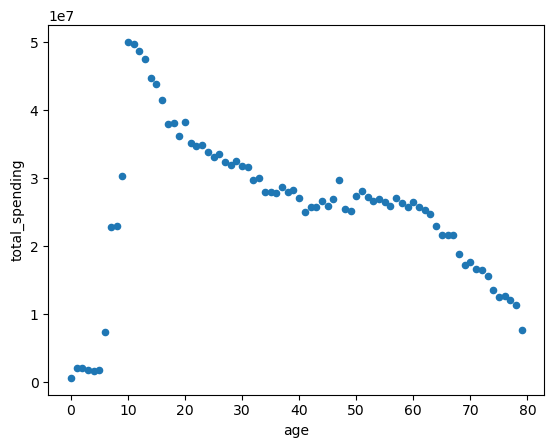

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType

# calculation of age up until 2023
df_age = df_users_sales.withColumn(
    "age", (datediff(current_date(), df_users["dob"]) / 365.25).cast(IntegerType())
)

# calculating spending and grouping by age
df_spending = df_age.groupBy("age").agg(sum("price").alias("total_spending"))
# sorting by spending and top 1000
df_spending_1000 = df_spending.orderBy(col("total_spending").desc()).limit(1000)
# formatting
df_spending_1000 = df_spending_1000.withColumn(
    "Total_spending_by_age", format_number(col("total_spending"), 2)
)
df_spending_1000.show(truncate=False)
# converting to pandas
pddf_spending_1000 = df_spending_1000.toPandas()
pddf_spending_1000.plot.scatter(x="age", y="total_spending")

### Part 3 RDDs vs DataFrame vs Spark SQL (15%) <a class="anchor" name="part-3"></a>
Implement the following queries using RDDs, DataFrames in SparkSQL separately. Log the  time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference between these 3 approaches. 


#### Query: Find top 100 most popular products (by total sales) among user age group 20-40, group by brand, and show total sales revenue of each brand.

#### 3.1. RDD Implementation

**Setting up the RDDs to execute the ask**

In [33]:
# getting user_id and dob
user_age = rdd_users_without_header.map(lambda row: (row[0], [row[3]]))

# extracting product_id & brand
rdd_prod_brand = rdd_product_without_header.map(lambda row: (row[0], [row[2]]))

# drawing sales with user_id, sale_id, prod_id and price
rdd_sale_data = rdd_sales_without_header.map(
    lambda row: (row[4], [row[2], row[0], row[3]])
)

# joining the rdds
rdd_user_sale = rdd_sale_data.join(user_age)

# calculating age
rdd_user_sale_1 = rdd_user_sale.map(lambda row: (row[0], [*row[1][0] + [*row[1]][1]]))
rdd_user_sale_2 = rdd_user_sale_1.map(
    lambda row: (
        row[0],
        row[1][0:3]
        + [
            int(
                (datetime.today() - datetime.strptime(row[1][3], "%d-%m-%Y")).days
                / 365.25
            )
        ],
    )
)

**Now implementing as per the ask**

In [34]:
# capturing time for RDD implementation
%time

# filtering age - (user_id, prod_id, sale_id, price)
filtered_sale = rdd_user_sale_2.filter(lambda row: 20 <= row[1][3] <= 40).map(
    lambda row: (row[0], row[1][0], row[1][1], float(row[1][2]))
)
# print(filtered_sale.take(5)) - (prod_id, uid, sales_id, price)
filtered_sale_kv = filtered_sale.map(lambda row: (row[1], [row[2], row[3]]))
# print(filtered_sale_kv.take(5))
filtered_sale_prod_kv = filtered_sale_kv.groupByKey().mapValues(list)
# print(filtered_sale_prod_kv.take(1))
# taking top product_ids based on count of sale_id
def rank_id(iter):
    count = 0
    total_sum = 0.0
    for row in iter:
        count += 1
        total_sum += row[1]
    return (count, total_sum)


# calculating the count of sale_ids and the top 100 prod_is
top_sale_prod = (
    filtered_sale_prod_kv.groupByKey()
    .mapValues(lambda row: [rank_id(x) for x in row])
    .sortBy(lambda row: row[1][0], ascending=False)
    .take(100)
)
# converting it back to an RDD
rdd_top_sale_prod = sc.parallelize(top_sale_prod)
# joining with product data to get brand
rdd_sales_prod = rdd_top_sale_prod.join(rdd_prod_brand)
# extracting brand and revenue
rdd_brand_revenue = rdd_sales_prod.map(lambda row: (row[1][1][0], row[1][0][0][1]))
rdd_brand_final = rdd_brand_revenue.reduceByKey(lambda a, b: a + b).sortBy(
    lambda row: row[1], ascending=False
)

print(rdd_brand_final.take(10))

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 28.8 µs
[('apple', 450077278.2899976), ('samsung', 163710317.95999458), ('xiaomi', 28462276.460000366), ('', 24604702.200000245), ('huawei', 15468013.900000084), ('oppo', 10154520.159999693), ('sony', 3499908.780000069), ('lenovo', 1840829.7400000426), ('artel', 1468725.0399999917)]


#### 3.2. DataFrame Implementation

In [35]:
# capturing time for dataframe implementation
%time

from pyspark.sql.window import Window

# age filteration
df_age_filtered = df_age.filter((col("age") >= 20) & (col("age") <= 40))

# count for popular products
df_pop_products = df_age_filtered.groupBy("product_id").agg(count("id").alias("count"))

# rank
rank_window = Window.orderBy(col("count").desc())
df_ranked_prod = df_pop_products.withColumn("rank", row_number().over(rank_window))

# top 100 IDs
df_top_prods = df_ranked_prod.filter(col("rank") <= 100).select("product_id")

df_filtered_prod = df_product.join(df_top_prods, "product_id")

# filtering and taking needed data like brand and total_revenue
df_filtered_prod = (
    df_filtered_prod.join(df_age_filtered, "product_id")
    .groupBy("brand")
    .agg(round(sum(col("price")) / 1000, 2).alias("total_revenue"))
    .orderBy(col("total_revenue").desc())
)

df_filtered_prod.show()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 25.3 µs
+-------+-------------+
|  brand|total_revenue|
+-------+-------------+
|  apple|    450077.28|
|samsung|    163710.32|
| xiaomi|     28462.28|
|   null|      24604.7|
| huawei|     15468.01|
|   oppo|     10154.52|
|   sony|      3499.91|
| lenovo|      1840.83|
|  artel|      1468.73|
+-------+-------------+



#### 3.3. Spark SQL Implementation

In [36]:
# capturing time for SQL implementation
%time

# creating a view
df_sales_date.createOrReplaceTempView("view_sales_date")
df_age.createOrReplaceTempView("view_age")
df_product.createOrReplaceTempView("view_product")

spark.sql(
    """
    SELECT product_id, id, age, price
    FROM view_age
    WHERE age BETWEEN 20 AND 40
"""
).createOrReplaceTempView("view_filtered_age")

view_ranked_prods = spark.sql(
    """
    SELECT product_id, COUNT(id) AS count
    FROM view_filtered_age
    GROUP BY product_id
"""
).createOrReplaceTempView("view_ranked_prods")

spark.sql(
    """
    SELECT product_id, count, ROW_NUMBER() OVER (ORDER BY count DESC) AS rank
    FROM view_ranked_prods
"""
).createOrReplaceTempView("ranked_prods")

spark.sql(
    """
    SELECT product_id
    FROM ranked_prods
    WHERE rank <= 100
"""
).createOrReplaceTempView("top_ranked_prods")

spark.sql(
    """
    SELECT p.brand, ROUND(SUM(af.price) / 1000, 2) AS total_revenue
    FROM top_ranked_prods tp
    JOIN view_product p ON tp.product_id = p.product_id
    JOIN view_filtered_age af ON p.product_id = af.product_id
    GROUP BY p.brand
    ORDER BY total_revenue DESC
"""
).show()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 16.7 µs
+-------+-------------+
|  brand|total_revenue|
+-------+-------------+
|  apple|    450077.28|
|samsung|    163710.32|
| xiaomi|     28462.28|
|   null|      24604.7|
| huawei|     15468.01|
|   oppo|     10154.52|
|   sony|      3499.91|
| lenovo|      1840.83|
|  artel|      1468.73|
+-------+-------------+



# Without duplicates

**Dataframe Without duplicates**

In [37]:
# capturing time for dataframe implementation
%time

from pyspark.sql.window import Window

# age filteration
df_age_filtered = df_age.filter((col("age") >= 20) & (col("age") <= 40))

# count for popular products
df_pop_products = df_age_filtered.groupBy("product_id").agg(count("id").alias("count"))

# rank
rank_window = Window.orderBy(col("count").desc())
df_ranked_prod = df_pop_products.withColumn("rank", row_number().over(rank_window))

# top 100 IDs
df_top_prods = df_ranked_prod.filter(col("rank") <= 100).select("product_id")

df_filtered_prod = df_product_without_duplicates.join(df_top_prods, "product_id")

# filtering and taking needed data like brand and total_revenue
df_filtered_prod = (
    df_filtered_prod.join(df_age_filtered, "product_id")
    .groupBy("brand")
    .agg(round(sum(col("price")) / 1000, 2).alias("total_revenue"))
    .orderBy(col("total_revenue").desc())
)

df_filtered_prod.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 223 µs
+-------+-------------+
|  brand|total_revenue|
+-------+-------------+
|  apple|    225679.89|
|samsung|     87211.84|
| xiaomi|     14231.14|
| huawei|      7734.01|
|   null|      5484.04|
|   oppo|      5077.26|
|   sony|      1749.95|
| lenovo|       920.41|
|  artel|       734.36|
+-------+-------------+



**SQL Without duplicates**

In [32]:
# capturing time for SQL implementation
%time

# creating a view
df_sales_date.createOrReplaceTempView("view_sales_date")
df_age.createOrReplaceTempView("view_age")
df_product_without_duplicates.createOrReplaceTempView("view_product")

spark.sql(
    """
    SELECT product_id, id, age, price
    FROM view_age
    WHERE age BETWEEN 20 AND 40
"""
).createOrReplaceTempView("view_filtered_age")

view_ranked_prods = spark.sql(
    """
    SELECT product_id, COUNT(id) AS count
    FROM view_filtered_age
    GROUP BY product_id
"""
).createOrReplaceTempView("view_ranked_prods")

spark.sql(
    """
    SELECT product_id, count, ROW_NUMBER() OVER (ORDER BY count DESC) AS rank
    FROM view_ranked_prods
"""
).createOrReplaceTempView("ranked_prods")

spark.sql(
    """
    SELECT product_id
    FROM ranked_prods
    WHERE rank <= 100
"""
).createOrReplaceTempView("top_ranked_prods")

spark.sql(
    """
    SELECT p.brand, ROUND(SUM(af.price) / 1000, 2) AS total_revenue
    FROM top_ranked_prods tp
    JOIN view_product p ON tp.product_id = p.product_id
    JOIN view_filtered_age af ON p.product_id = af.product_id
    GROUP BY p.brand
    ORDER BY total_revenue DESC
"""
).show()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 17.2 µs
+-------+-------------+
|  brand|total_revenue|
+-------+-------------+
|  apple|    225679.89|
|samsung|     87211.84|
| xiaomi|     14231.14|
| huawei|      7734.01|
|   null|      5484.04|
|   oppo|      5077.26|
|   sony|      1749.95|
| lenovo|       920.41|
|  artel|       734.36|
+-------+-------------+



### 3.4 Observe the query execution time among RDD, DataFrame, SparkSQL, which is the fastest and why? (Maximum 500 words.)

**NOTE:
    Since RDD has duplicates and more rows of data, the DataFrame and SQL implementation has been done in two formats:**
    
    *With duplicates
    *Without duplicates
    
    We can notice that the output for all three API's (DataFrame and SQL without duplicates match) and is a good case for efficiency comparison.

**Case**
In the above-mentioned case, we are comparing the execution time for three different APIs to achieve the same task with very similar approaches. Please note that we began the data operation for Data frames and SQL at the stage where the data was aggregated and age needed to be filtered out. Considering this, even for RDDs, time has been measured only from the second cell for fair comparison.

**Brief**
This activity aimed to understand the execution efficiency of three APIs (RDDs, Dataframes and datasets) to execute one output from the same raw data. 
We can observe that RDDs took significantly longer (wall time) than Dataframes (+~200%) and datasets (+~500%) in the above-mentioned time.
Overall, SQL Spark is the fastest in terms of processing data and performing operations.

**Understanding the APIs:**
RDDs: A distributed collection of data elements spread across machines in the cluster. It can process structured as well as unstructured data.
Dataframes: A distributed column-based collection of data. It can process only semi-structured or structured data.
SQL: It is an extension of the Dataframes API with benefits of type-safe and object-oriented programming. Data of any kind can be processed with this API.
(Team, 2017)


**Reason for efficiency in SQL (extention of dataframes):**
SQL and Dataframes are more efficient as compared to RDDs because:
1.	Optimisation: Dataframes are built on the Spark SQL engine, which uses Catalyst to generate optimized physical and logical query plans. All relation-type queries go through the same code optimizer, making them faster and using less memory.
2.	Serialisation: One of the benefits of utilizing Dataframes is their Serialization capability. Essentially, this functionality enables the data to be serialized into binary format and stored in off-heap memory. Subsequently, any transformations performed on the data are executed directly on this off-heap memory. This API boasts a Tungsten physical execution backend, which proficiently manages the memory and dynamically generates bytecode for the evaluation of expressions. This feature contributes to the overall efficiency and effectiveness of the data processing and analysis. (“DataFrame — Pandas 1.0.3 Documentation,” 2014)
3.	There is no “garbage collection” that happens in Dataframes/SQL (based on the above logic of serialisation), it makes more memory space available. (Team, 2017)

**References:**

1.	DataFrame — pandas 1.0.3 documentation. (2014). Retrieved from Pydata.org website: https://pandas.pydata.org/docs/reference/frame.html
2.	Team, D. (2017, May 10). Apache Spark RDD vs DataFrame vs DataSet. DataFlair. https://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset/


#### Summary

The time might differ when running on different machines. Overall, the DataFrame and SQL queries run faster compared with RDD.


### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html

References:
1. Spark Programming Guide - Spark 2.1.0 Documentation. (n.d.). Spark.apache.org. Retrieved August 25, 2023, from https://spark.apache.org/docs/2.1.0/programming-guide.html#:~:text=By%20default%2C%20Spark%20creates%20one